<h1 style="color:rgb(0,120,170)">Assignment 4: PCA and Kernel PCA</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}= ( \mathbf{x}_1,...,\mathbf{x}_n )^\top$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

<h3 style="color:rgb(210,90,80)">Exercise 1 (20 points):</h3>

########## YOUR SOLUTION HERE ##########


### 1. Proving that $\left\langle \mathbf{C}\mathbf{a}, \mathbf{a} \right\rangle \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$

The covariance matrix $\mathbf{C}$ is defined as:
$$
\mathbf{C} = \frac{1}{n} \mathbf{X}^\top \mathbf{X}
$$
where $\mathbf{X}$ is a matrix whose rows are observations. Each element $c_{st}$ of $\mathbf{C}$ is given by:
$$
c_{st} = \frac{1}{n} \sum_{i=1}^n x_{is} x_{it}
$$
To show that $\mathbf{C}$ is positive semi-definite, consider any vector $\mathbf{a} \in \mathbb{R}^m$. The quadratic form can be written as:
$$
\left\langle \mathbf{C}\mathbf{a}, \mathbf{a} \right\rangle = \sum_{s,t=1}^m a_s a_t c_{st} = \frac{1}{n} \sum_{i=1}^n \left( \sum_{s=1}^m a_s x_{is} \right) \left( \sum_{t=1}^m a_t x_{it} \right) = \frac{1}{n} \sum_{i=1}^n (\mathbf{x}_i^\top \mathbf{a})^2
$$
Since squares of real numbers are non-negative, $(\mathbf{x}_i^\top \mathbf{a})^2 \geq 0$, hence the sum $\left\langle \mathbf{C}\mathbf{a}, \mathbf{a} \right\rangle \geq 0$, proving that $\mathbf{C}$ is positive semi-definite.

### 2. Implication that All Eigenvalues are Non-negative

If $\mathbf{C}$ is positive semi-definite, then for any eigenvector $\mathbf{v}$ of $\mathbf{C}$ with corresponding eigenvalue $\lambda$, we have:
$$
\mathbf{C}\mathbf{v} = \lambda \mathbf{v}
$$
Taking the dot product with $\mathbf{v}$ on both sides, we get:
$$
\mathbf{v}^\top \mathbf{C} \mathbf{v} = \lambda (\mathbf{v}^\top \mathbf{v}) = \lambda \|\mathbf{v}\|^2
$$
Since $\left\langle \mathbf{C}\mathbf{v}, \mathbf{v} \right\rangle \geq 0$ and $\|\mathbf{v}\|^2 > 0$ for non-zero $\mathbf{v}$, it follows that $\lambda \geq 0$.

### 3. Importance of Non-negative Eigenvalues in PCA

In PCA, the eigenvalues of the covariance matrix $\mathbf{C}$ represent the variance explained by the corresponding principal components. The non-negativity of these eigenvalues is crucial because:

- **Variance Interpretation**: Non-negative eigenvalues ensure that the variance along any principal component is non-negative, aligning with the intuitive understanding of variance as a measure of spread or dispersion, which cannot be negative.
- **Stability in Dimensionality Reduction**: PCA aims to reduce the dimensionality of the data while retaining as much variability as possible. Positive semi-definiteness guarantees that the process of projecting data onto lower dimensions through PCA does not invert the spread of the data, maintaining the integrity of the original data structure.
- **Optimality**: The non-negative eigenvalues facilitate an optimal ordering of the principal components, where components with larger eigenvalues capture more variance, aiding in effective dimensionality reduction and data interpretation.

This structure of the covariance matrix thereby supports the foundational goals of PCA in exploratory data analysis and machine learning.


<h2 style="color:rgb(0,120,170)">PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [2]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 

# import data from csv file,
data = np.genfromtxt('/Users/korhanerdogdu/Desktop/unsupervised_ml/faces94.csv', delimiter=',')


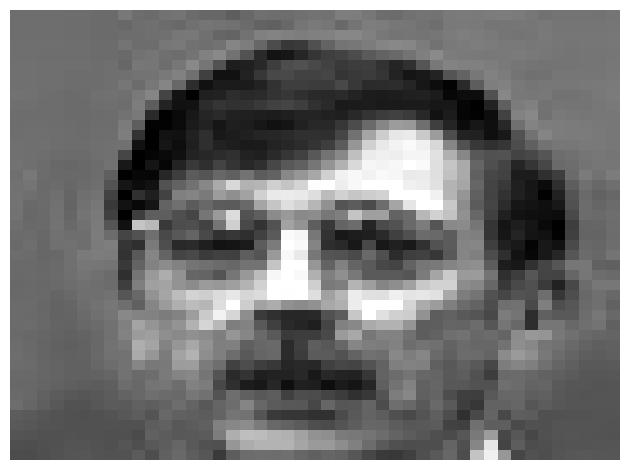

In [3]:
#plot first image as an example. Nothing to do here
def plotImg(x):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
    
# plot first img
plotImg(data[0, :])

In [4]:
data.shape

(3059, 2250)

In [5]:
import pandas as pd

df = pd.DataFrame(data)

df.head()  

,0,1,2,3,4,5,6,7,8,9,...,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249
0,0.431373,0.431373,0.431373,0.435294,0.435294,0.439216,0.439216,0.439216,0.447059,0.435294,...,0.329412,0.325490,0.321569,0.333333,0.337255,0.341176,0.341176,0.352941,0.337255,0.341176
1,0.160784,0.164706,0.168627,0.168627,0.172549,0.168627,0.168627,0.164706,0.164706,0.160784,...,0.070588,0.184314,0.219608,0.149020,0.145098,0.219608,0.184314,0.047059,0.619608,0.800000
2,0.458824,0.466667,0.478431,0.482353,0.494118,0.501961,0.505882,0.513725,0.521569,0.513725,...,0.407843,0.396078,0.384314,0.376471,0.372549,0.372549,0.364706,0.360784,0.341176,0.341176
3,0.447059,0.462745,0.482353,0.470588,0.439216,0.454902,0.458824,0.431373,0.501961,0.474510,...,0.407843,0.419608,0.419608,0.411765,0.400000,0.400000,0.400000,0.396078,0.384314,0.270588
4,0.427451,0.423529,0.423529,0.419608,0.427451,0.431373,0.431373,0.435294,0.423529,0.423529,...,0.372549,0.372549,0.372549,0.376471,0.372549,0.368627,0.364706,0.368627,0.360784,0.364706


<h3 style="color:rgb(210,90,80)">Exercise 2 (10 points):</h3>

We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

In [6]:
########## YOUR SOLUTION HERE ##########


import numpy as np
from sklearn.decomposition import PCA

X = data  # No need to load from sklearn, use my data directly

# Function to determine the number of components needed to explain given variance
def find_components_for_variance(explained_variance_ratios, target_variance):
    cumulative_variance = np.cumsum(explained_variance_ratios)
    components_count = np.argmax(cumulative_variance >= target_variance) + 1
    return components_count, cumulative_variance[components_count - 1]


pca = PCA(n_components=None)
pca.fit(X)

# Explained variances
variances = pca.explained_variance_ratio_

# Determine components needed for 50%, 75%, and 99% of variance
components_50, variance_50 = find_components_for_variance(variances, 0.50)
components_75, variance_75 = find_components_for_variance(variances, 0.75)
components_99, variance_99 = find_components_for_variance(variances, 0.99)


print(f"Components needed for 50% variance: {components_50}, Explained variance: {variance_50:.2f}")
print(f"Components needed for 75% variance: {components_75}, Explained variance: {variance_75:.2f}")
print(f"Components needed for 99% variance: {components_99}, Explained variance: {variance_99:.2f}")



Components needed for 50% variance: 4, Explained variance: 0.51
Components needed for 75% variance: 18, Explained variance: 0.76
Components needed for 99% variance: 367, Explained variance: 0.99


<h3 style="color:rgb(0,120,170)">Exercise 3 (10 points):</h3>

You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

In [7]:
########## YOUR SOLUTION HERE ##########

import numpy as np
from sklearn.decomposition import PCA

def decompress_pca(scores, components):
    """
    Decompress data that has been reduced in dimensionality by PCA.
    
    Parameters:
        scores (numpy.ndarray): The lower-dimensional representation of the data.
        components (numpy.ndarray): The principal components (loading matrix) used for PCA.
    
    Returns:
        numpy.ndarray: The reconstructed data points in the original high-dimensional space.
    """
    # Reconstruct the original data
    #original_data = np.dot(scores, components.T)
    original_data = scores @ components
    return original_data


In [8]:
from sklearn.decomposition import PCA

# Apply PCA with a reduced number of components, for example 100
pca = PCA(n_components=100)
scores = pca.fit_transform(data)
components = pca.components_


In [9]:
scores

array([[-0.4802571 ,  1.9322592 ,  0.59685641, ...,  0.11740288,
         0.19420537,  0.14048413],
       [ 7.25033484, -3.15456684, -0.53270773, ...,  0.34133453,
        -0.19420008, -0.14509906],
       [-5.02782029,  3.95451573,  1.56885986, ..., -0.06064103,
        -0.29655029, -0.10330036],
       ...,
       [-1.77007284, -2.69422936, -0.17952045, ..., -0.01914378,
         0.00808352, -0.51118043],
       [ 7.26711568, -3.09458879,  2.02503009, ...,  0.05965397,
        -0.19069862,  0.11361988],
       [-0.12893179,  4.08031038, -0.80551864, ...,  0.25239492,
        -0.16431357,  0.27092784]])

In [10]:
scores.shape

(3059, 100)

***Number of Data Points (3059):***

The first dimension (3059) corresponds to the number of data points or samples in your dataset. This indicates that your original dataset contains 3059 individual items, and this count remains unchanged in the transformed dataset. Each row represents the PCA-transformed version of a single data point.

***Number of Principal Components (100):***

The second dimension (100) represents the number of principal components retained in the PCA. These are the dimensions to which the original data’s features were reduced.
This reduction means that each original data point, which initially had 2250 features, is now represented by just 100 principal component scores. These scores represent the data point’s coordinates in the new, reduced feature space defined by the principal components.

In [11]:
components

array([[-0.01428546, -0.01433947, -0.01452931, ..., -0.00350719,
         0.00095479,  0.00509862],
       [ 0.01335736,  0.01355896,  0.013371  , ...,  0.0172773 ,
         0.01338224,  0.01088618],
       [ 0.00624116,  0.00635998,  0.00642847, ...,  0.01953833,
         0.02060759,  0.0217179 ],
       ...,
       [-0.00197413, -0.00197268, -0.00144919, ..., -0.02614877,
        -0.01055366, -0.0006599 ],
       [ 0.00321505,  0.00189049,  0.00138366, ..., -0.03783549,
        -0.03765363,  0.00448124],
       [ 0.00265117,  0.00299429,  0.00132664, ..., -0.01403507,
        -0.00293075,  0.01821775]])

In [12]:
components.shape

(100, 2250)

***The first dimension of the array (100)*** represents the number of principal components that were retained in the PCA process.
This indicates that you have reduced the dimensionality of your dataset to 100 principal components. These components are the directions in your dataset that capture the most variance (i.e., the most informative aspects of your data under the PCA model

***Original Features (2250):***

The second dimension (2250) corresponds to the number of features in your original dataset.
Each component is a vector of the same length as the number of original features, showing how much each feature contributes to that component.

In [13]:
# Decompress the PCA-transformed data
reconstructed_data = decompress_pca(scores, components)

# Print the dimension of the back-transformed data
print("Dimension of the reconstructed data:", reconstructed_data.shape)

# Print a sample of the back-transformed data to verify correctness
print("Sample of the reconstructed data:\n", reconstructed_data[:1])  # Showing first data point

Dimension of the reconstructed data: (3059, 2250)
Sample of the reconstructed data:
 [[0.05489078 0.05803387 0.05786339 ... 0.03650337 0.04240863 0.06779878]]


<h3 style="color:rgb(210,90,80)">Exercise 4 (15 points):</h3>

Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

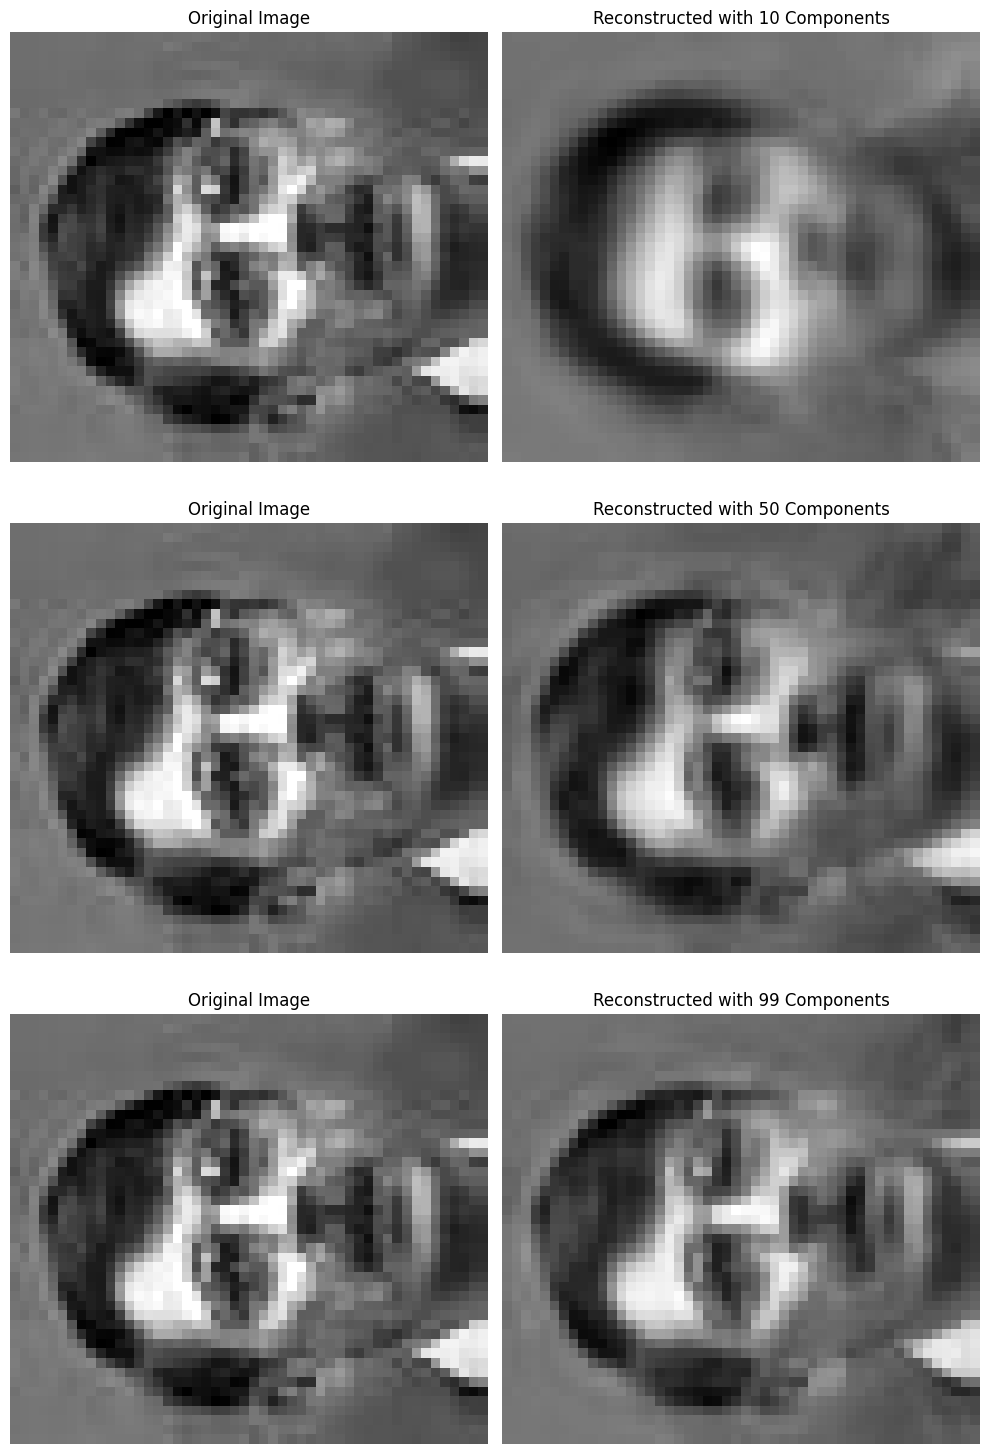

In [14]:
########## YOUR SOLUTION HERE ##########




from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Our data has a shape of  (3059, 2250)
data = data.reshape(-1, 45, 50)  # Reshape the flat images into 45x50 images, 45x50 = 2250. Thats why.

def plot_reconstructions(components_list):
    fig, axes = plt.subplots(nrows=len(components_list), ncols=2, figsize=(10, 5 * len(components_list)))

    for i, n_components in enumerate(components_list):
        pca = PCA(n_components=n_components)
        scores = pca.fit_transform(data.reshape(data.shape[0], -1))  # Flatten the images back for PCA
        reconstructed = pca.inverse_transform(scores).reshape(-1, 45, 50)  # Reshape after reconstruction

        # Original Image
        axes[i, 0].imshow(data[0], cmap='gray')
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')

        # Reconstructed Image
        axes[i, 1].imshow(reconstructed[0], cmap='gray')
        axes[i, 1].set_title(f'Reconstructed with {n_components} Components')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Determine the number of components for variance levels approximately
components_to_try = [10, 50, 99]  
plot_reconstructions(components_to_try)


In [15]:
data.shape

(3059, 45, 50)

<h3 style="color:rgb(210,90,80)">Exercise 5 (5 points):</h3>

Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?

########## YOUR SOLUTION HERE ##########


***1. 50% Variance***

Preserved Information: At a 50% variance preservation level, PCA tends to retain the most prominent features of the images. These include major structural outlines and high-contrast areas that contribute significantly to the overall variance. The images will likely still be recognizable, but with noticeable loss in detail.


Lost Information: Finer details, subtle textures, and color gradients are often lost. This level of compression typically results in images that appear blurry or smoothed, as the PCA focuses on the largest, most dominant features and discards those that contribute less to the overall variance.


***2. 75% Variance***

Preserved Information: Increasing the variance preserved to 75% results in better retention of the images' visual characteristics. More detail, including finer structural details and some textural information, will be noticeable compared to the 50% level. The images are generally clearer and more detailed.


Lost Information: While better than at 50% variance, some finer textural details and subtle color changes might still be missing. Low-contrast details that do not contribute heavily to the variance might be lost.


***3. 99% Variance***


Preserved Information: At this level, nearly all the visual information in the original images is preserved. This includes almost all details, textures, shadows, and highlights. The reconstructed images should closely resemble the original, with very slight differences that might not even be noticeable to the naked eye.


Lost Information: Only the most minute details that contribute very little to the overall variance might be lost. These could be extremely fine textures or subtle noise in the image, which are generally not crucial for most applications.

<h2 style="color:rgb(0,120,170)">PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [16]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('/Users/korhanerdogdu/Desktop/unsupervised_ml/pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('/Users/korhanerdogdu/Desktop/unsupervised_ml/pca4.csv', delimiter = ',', skip_header = 0)

In [17]:
data3.shape

(400, 2)

In [18]:
data4.shape

(160, 3)

<h3 style="color:rgb(0,120,170)">Exercise 6 (10 Points):</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

PCA for Data3:


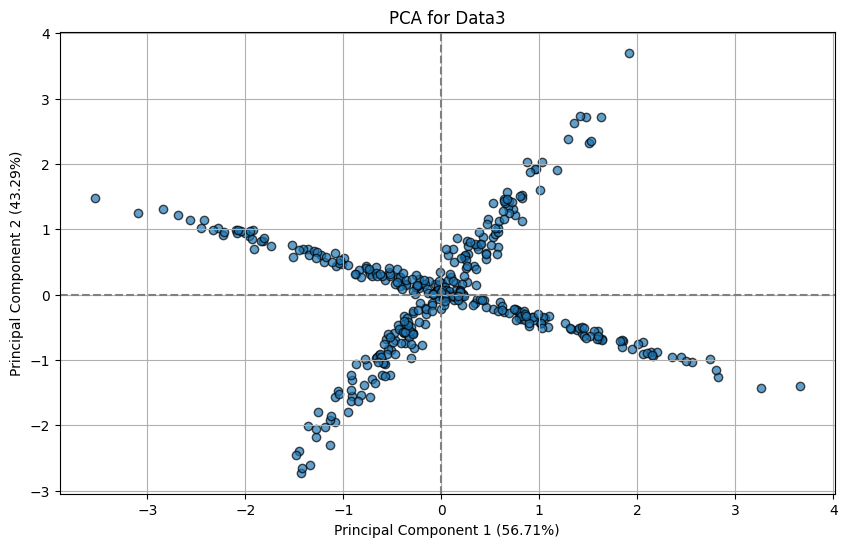

Proportion of variance explained by each component: [0.56706949 0.43293051]
PCA for Data4:


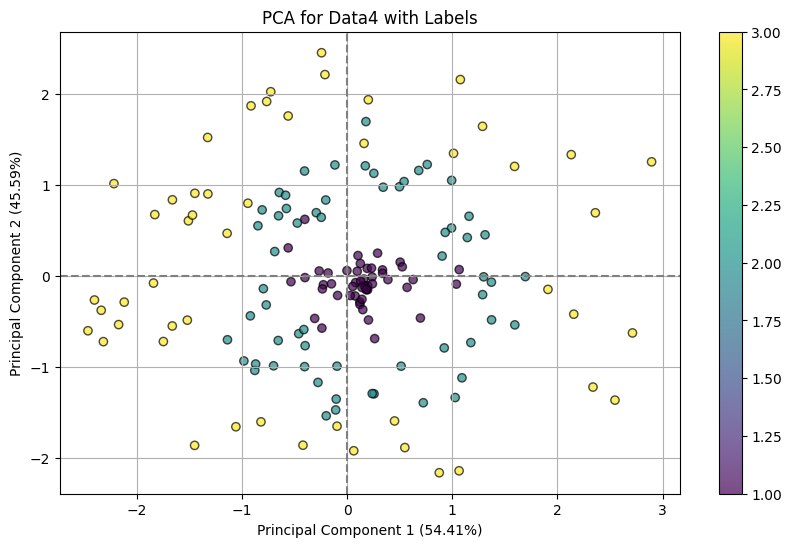

Proportion of variance explained by each component: [0.54408045 0.45591955]


In [19]:
########## YOUR SOLUTION HERE ##########


import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Standardize the data
scaler = StandardScaler()
data3_scaled = scaler.fit_transform(data3)

# Extracting features and labels for data4
data4_features = data4[:, :-1]
data4_labels = data4[:, -1]
data4_scaled = scaler.fit_transform(data4_features)

# Defining a function to perform PCA and plot the results
def perform_pca_and_plot(data, labels=None, title="PCA Results"):
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization. They have 2 columns. 
    principal_components = pca.fit_transform(data)
    explained_variance = pca.explained_variance_ratio_

    plt.figure(figsize=(10, 6))
    if labels is not None:
        scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
        plt.colorbar(scatter)
    else:
        plt.scatter(principal_components[:, 0], principal_components[:, 1], edgecolor='k', alpha=0.7)
    plt.axvline(0, color='grey', linestyle='--')
    plt.axhline(0, color='grey', linestyle='--')
    plt.xlabel('Principal Component 1 ({:.2f}%)'.format(explained_variance[0]*100))
    plt.ylabel('Principal Component 2 ({:.2f}%)'.format(explained_variance[1]*100))
    plt.title(title)
    plt.grid(True)
    plt.show()

    print(f"Proportion of variance explained by each component: {explained_variance}")

# Performing PCA and visualize for data3
print("PCA for Data3:")
perform_pca_and_plot(data3_scaled, title="PCA for Data3")

# Performing PCA and visualize for data4 with labels
print("PCA for Data4:")
perform_pca_and_plot(data4_scaled, labels=data4_labels, title="PCA for Data4 with Labels")


***Data3*** only needs standardization and PCA since it's already two-dimensional. This means the PCA might not seem necessary, but it's still useful to see the variance proportions.


***Data4*** includes a labels column, so we separate it, standardize the features, perform PCA, and then use the labels to color the points in the plot. This helps in identifying if specific labels cluster together in the principal component space.

<h3 style="color:rgb(0,120,170)">Exercise 7 (20 points):</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

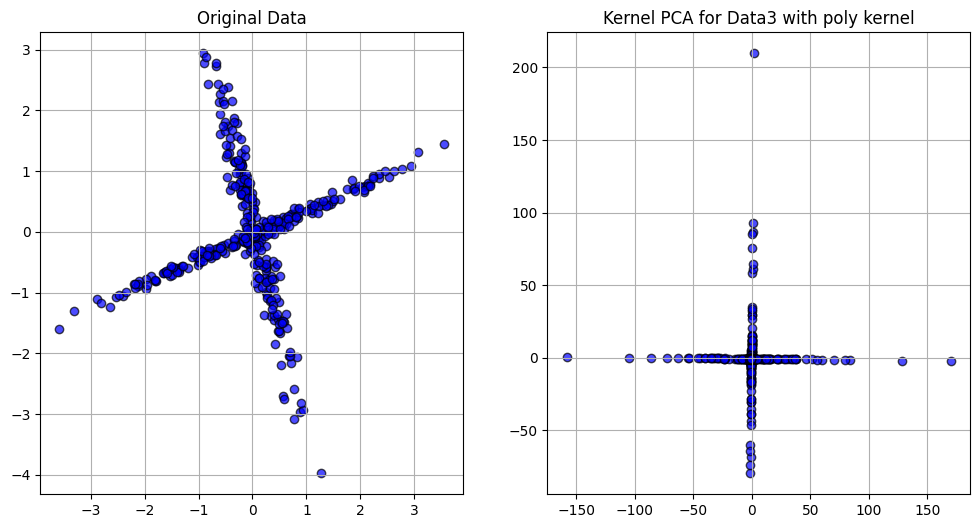

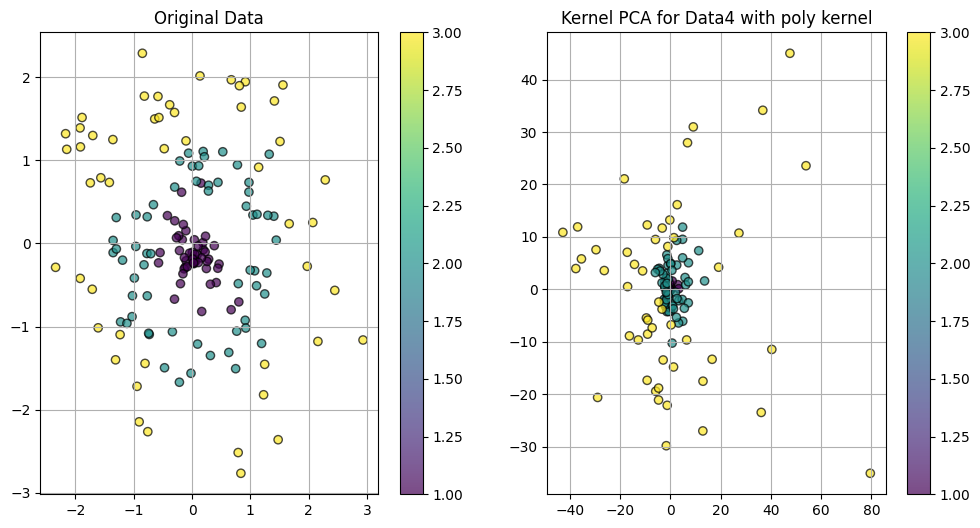

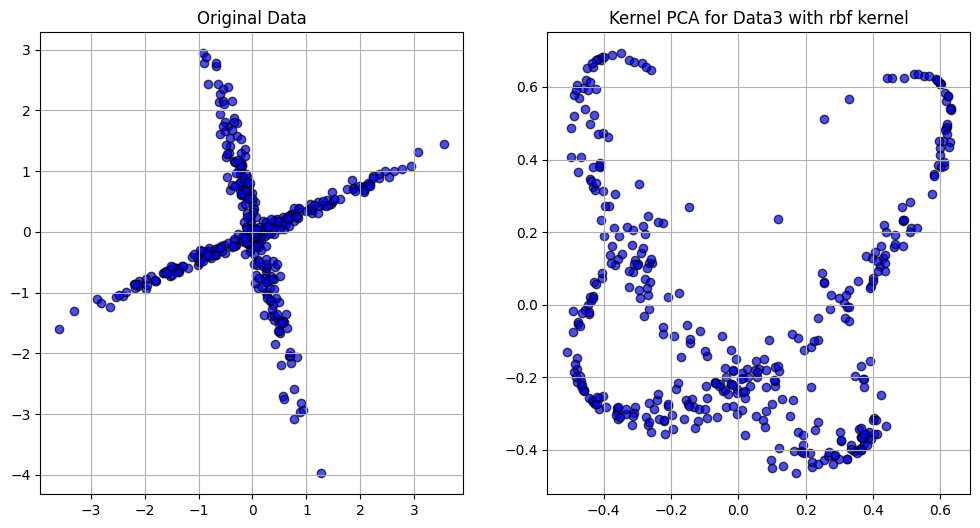

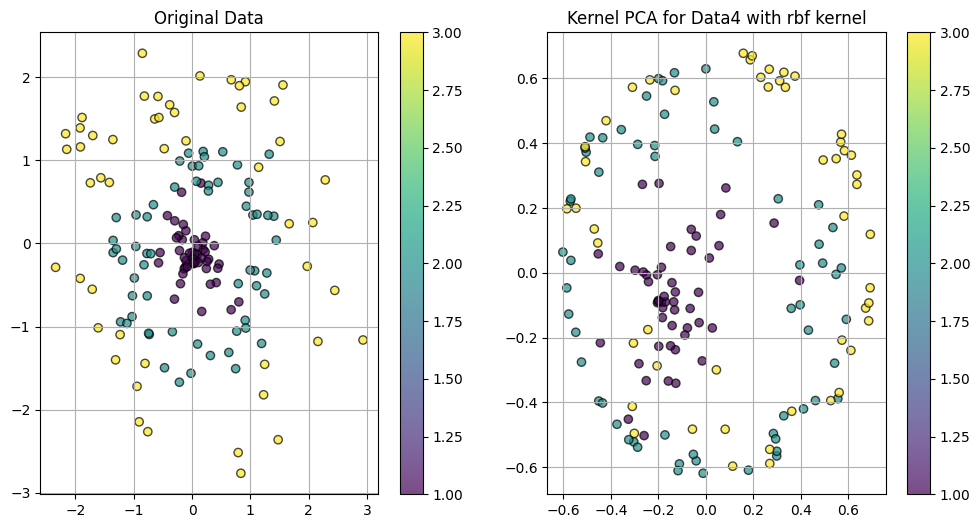

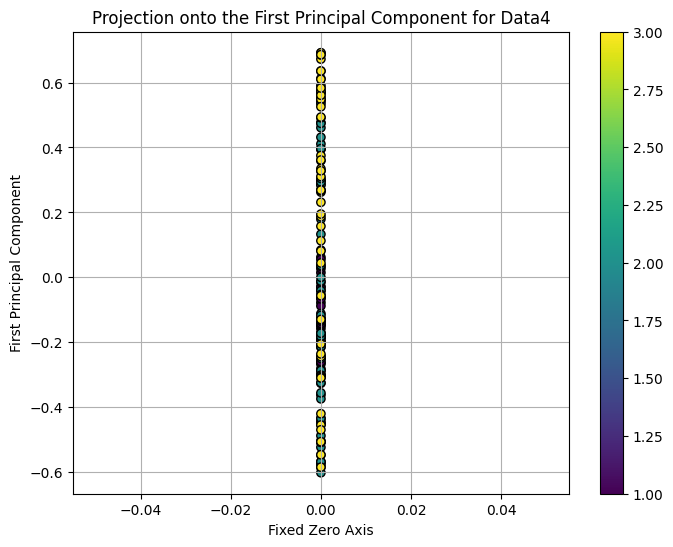

In [20]:
########## YOUR SOLUTION HERE ##########

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler


# Standardize data, i.e each value will be between 0 and 1.
scaler = StandardScaler()
data3_scaled = scaler.fit_transform(data3[:, :2])  # Assuming no labels in data3
data4_features_scaled = scaler.fit_transform(data4[:, :2])  # Ignoring the labels for PCA
data4_labels = data4[:, -1]  # Extracting labels for coloring plots





def apply_kernel_pca(data, kernel, gamma, degree=None, title="Kernel PCA"):
    kpca = KernelPCA(kernel=kernel, gamma=gamma, degree=degree if degree is not None else 3, n_components=2)
    transformed_data = kpca.fit_transform(data)
    return transformed_data

# Kernels and parameters to try
kernels_params = [('poly', {'gamma': 2, 'degree': 3}),
                  ('rbf', {'gamma': 0.25})]

# Visualization function
def plot_transformed_data(original_data, transformed_data, labels=None, title=""):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    if labels is not None:
        plt.scatter(original_data[:, 0], original_data[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
        plt.colorbar()
    else:
        plt.scatter(original_data[:, 0], original_data[:, 1], color='blue', edgecolor='k', alpha=0.7)
    plt.title("Original Data")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    if labels is not None:
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
        plt.colorbar()
    else:
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='blue', edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Applying Kernel PCA for each kernel and dataset, and plot
for kernel, params in kernels_params:
    # Data3
    transformed_data3 = apply_kernel_pca(data3_scaled, kernel=kernel, **params)
    plot_transformed_data(data3_scaled, transformed_data3, title=f"Kernel PCA for Data3 with {kernel} kernel")

    # Data4
    transformed_data4 = apply_kernel_pca(data4_features_scaled, kernel=kernel, **params)
    plot_transformed_data(data4_features_scaled, transformed_data4, labels=data4_labels, title=f"Kernel PCA for Data4 with {kernel} kernel")

    
# Using RBF kernel with gamma=0.25
kpca_rbf = KernelPCA(kernel='rbf', gamma=0.25, n_components=1)
first_pc_data4 = kpca_rbf.fit_transform(data4_features_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(np.zeros(first_pc_data4.shape[0]), first_pc_data4[:, 0], c=data4_labels, cmap='viridis', edgecolor='k')
plt.colorbar()
plt.title("Projection onto the First Principal Component for Data4")
plt.xlabel("Fixed Zero Axis")
plt.ylabel("First Principal Component")
plt.grid(True)
plt.show()





<h3 style="color:rgb(0,120,170)">Exercise 8 (10 points):</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


########## YOUR SOLUTION HERE ##########


Advantages of Kernel PCA

***-Handling Non-Linear Structures:***

***Key Advantage:*** Kernel PCA can handle non-linear relationships in the data, which linear PCA cannot. By using kernel methods, Kernel PCA effectively maps data into a higher-dimensional space where non-linear relationships manifest as linear. This is particularly useful for complex datasets where the underlying patterns are not linearly separable in the original space.

***Observable in:*** Complex datasets like images, complex patterns in genomics, or any dataset where the structure of the data includes interactions and polynomial dependencies not observable in the original dimensions.

***-Improved Feature Extraction:***

***Key Advantage:*** In higher-dimensional space, Kernel PCA can extract more relevant features that capture significant variance and underlying structures of the data better than linear PCA. This can lead to improved performance in machine learning algorithms, especially in classification tasks.

***Observable in:*** Data where the groups or categories are separated by complex boundaries that are not linear.



Disadvantages of Kernel PCA

***-Computational Complexity:***

***Key Disadvantage:*** Kernel PCA is computationally more intensive than linear PCA. The complexity arises from computing the kernel matrix, especially if the dataset is large. This can make Kernel PCA less scalable to very large datasets.

***Observable in:*** Large datasets where the computation of the kernel matrix (which is of size  n×n, where n is the number of data points) becomes computationally expensive.

***-Choice of Kernel and Parameters:***

***Key Disadvantage:*** The effectiveness of Kernel PCA heavily depends on the choice of the kernel function and its parameters (e.g., the bandwidth parameter in the RBF kernel, the degree in polynomial kernels). Choosing these parameters often requires cross-validation and can be non-trivial without domain knowledge.

***Observable in:*** Datasets where it is not clear which kernel and parameters will best uncover the structure of the data. Mischosen parameters can lead to overfitting or underfitting, obscuring the true relationships in the data.

***-Memory Usage:***

***Key Disadvantage:*** Kernel PCA requires storing the kernel matrix, which can consume a significant amount of memory for large datasets.

***Observable in:*** Situations with memory constraints or very large datasets, where holding a full n×n matrix in memory is impractical.